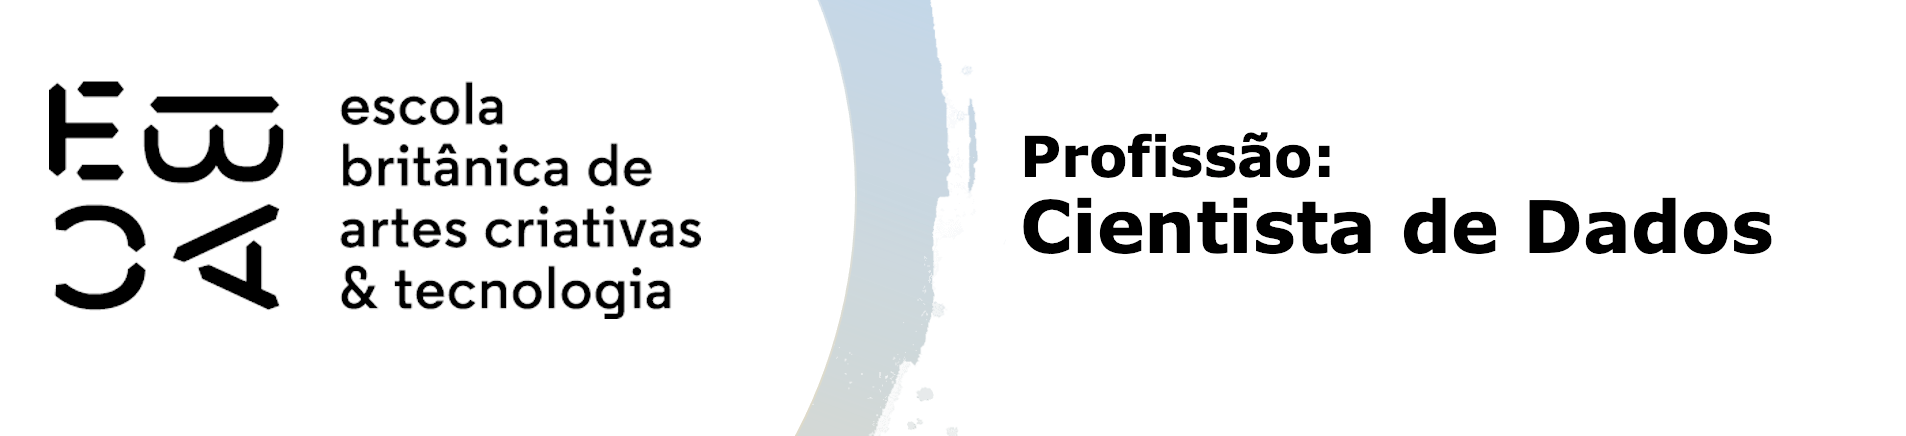

# Métodos hierárquicos de agrupamento - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [2]:
df = sns.load_dataset("penguins")
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
variaveis_quantitativas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_quanti = df[variaveis_quantitativas].copy()


In [4]:
df_quanti.dropna(inplace=True)


In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quanti)


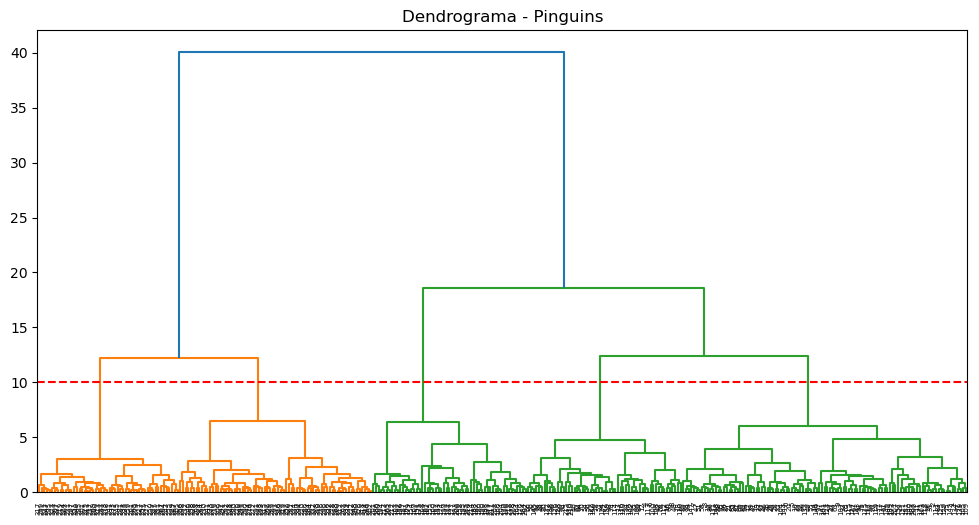

In [6]:
plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Pinguins")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=10, color='r', linestyle='--') 
plt.show()


In [8]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_quanti['grupo'] = cluster.fit_predict(df_scaled)


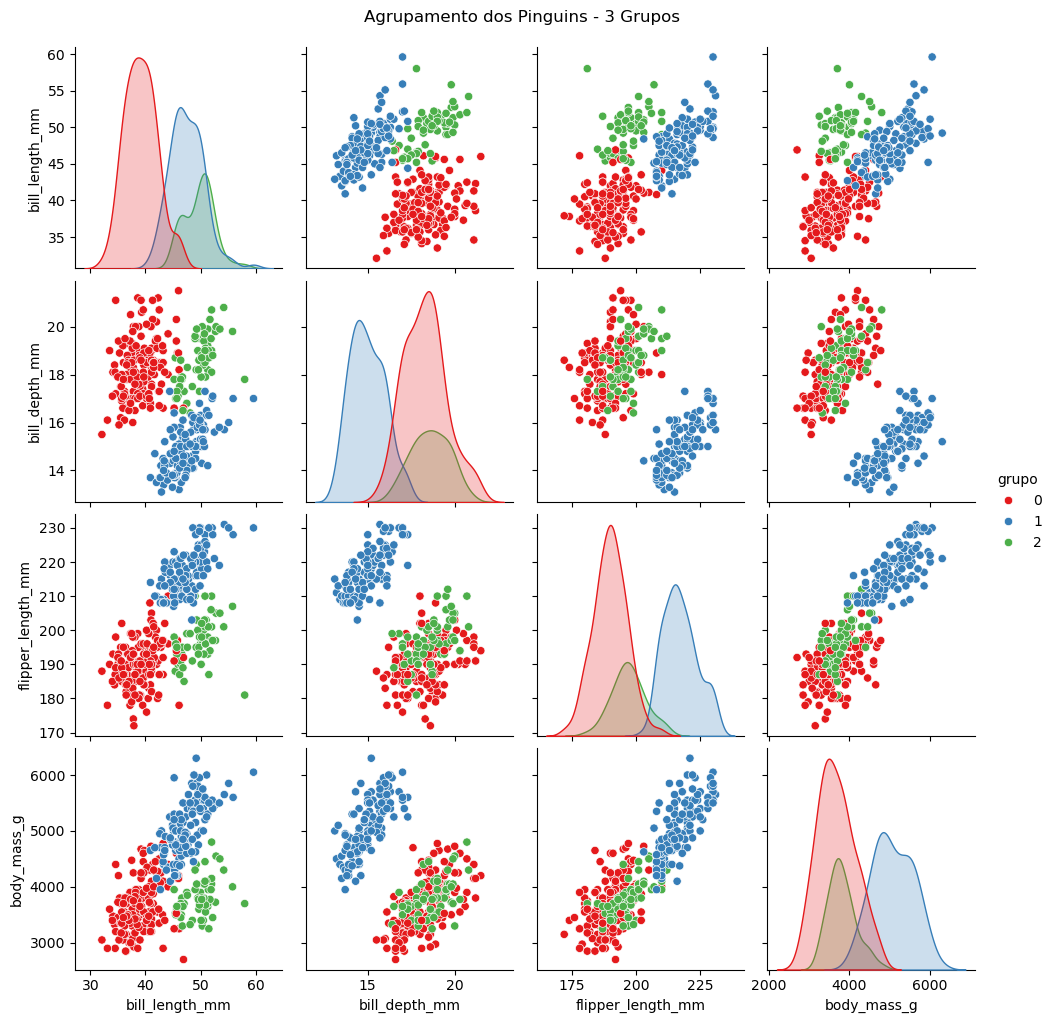

In [9]:
sns.pairplot(df_quanti, hue='grupo', palette='Set1')
plt.suptitle("Agrupamento dos Pinguins - 3 Grupos", y=1.02)
plt.show()


## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [10]:
df_avaliacao = df.loc[df_quanti.index].copy()
df_avaliacao['grupo'] = df_quanti['grupo'].values


In [11]:
contagem = pd.crosstab(df_avaliacao['grupo'], df_avaliacao['species'])
print(contagem)


species  Adelie  Chinstrap  Gentoo
grupo                             
0           151         11       0
1             0          0     123
2             0         57       0


In [12]:
estatisticas = df_avaliacao.groupby('grupo')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].describe()
print(estatisticas)


      bill_length_mm                                                      \
               count       mean       std   min   25%   50%    75%   max   
grupo                                                                      
0              162.0  39.150000  2.936560  32.1  37.0  39.0  41.10  46.9   
1              123.0  47.504878  3.081857  40.9  45.3  47.3  49.55  59.6   
2               57.0  49.752632  2.710107  45.2  47.5  50.2  51.30  58.0   

      bill_depth_mm             ... flipper_length_mm        body_mass_g  \
              count       mean  ...               75%    max       count   
grupo                           ...                                        
0             162.0  18.287654  ...            194.75  210.0       162.0   
1             123.0  14.982114  ...            221.00  231.0       123.0   
2              57.0  18.601754  ...            201.00  212.0        57.0   

                                                                          
           

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [ ]:
#Pelo espaçamento das ramificações, o corte em 4 grupos .

In [13]:
cluster_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_quanti['grupo_4'] = cluster_4.fit_predict(df_scaled)

df_avaliacao = df.loc[df_quanti.index].copy()
df_avaliacao['grupo_4'] = df_quanti['grupo_4'].values


In [14]:
pd.crosstab(df_avaliacao['grupo_4'], df_avaliacao['species'])


species,Adelie,Chinstrap,Gentoo
grupo_4,,,
0,0,0,123
1,97,8,0
2,0,57,0
3,54,3,0


In [15]:
pd.crosstab(df_avaliacao['grupo_4'], [df_avaliacao['species'], df_avaliacao['sex']])


species Adelie      Chinstrap      Gentoo     
sex     Female Male    Female Male Female Male
grupo_4                                       
0            0    0         0    0     58   61
1           72   21         8    0      0    0
2            0    0        23   34      0    0
3            1   52         3    0      0    0

In [ ]:
#No agrupamento com 4 grupos, o grupo 0 ficou com todos os pinguins da espécie Gentoo (123 no total). O grupo 1 tem principalmente pinguins da espécie Adelie (97) e alguns poucos da espécie Chinstrap (8). O grupo 2 é quase todo formado por pinguins da espécie Chinstrap (57). Já o grupo 3 tem pinguins da espécie Adelie (54) e alguns poucos da espécie Chinstrap (3).

In [ ]:
#No grupo 0, todos os pinguins são da espécie Gentoo, sendo 58 fêmeas e 61 machos. No grupo 1, há principalmente pinguins da espécie Adelie, com 72 fêmeas e 21 machos, além de 8 fêmeas da espécie Chinstrap. No grupo 2, estão os pinguins da espécie Chinstrap, com 33 fêmeas e 24 machos. Já no grupo 3, há 52 fêmeas e 2 machos da espécie Adelie, e 3 fêmeas da espécie Chinstrap.

In [ ]:
#O agrupamento hierárquico com 4 grupos conseguiu capturar bem a separação natural das espécies Gentoo e Chinstrap, além de subdividir a espécie Adelie com base em diferenças relacionadas ao sexo ou características físicas. O modelo, portanto, foi eficaz em identificar estruturas latentes nos dados, possivelmente combinando espécie e sexo como principais padrões.